In [7]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [6]:
# Load your dataset
data = pd.read_csv('sensor_data.csv')


In [9]:
# Print column names
print(data.columns)

# Display the first few rows of the dataset
print(data.head())


Index(['Temperature', 'Humidity', 'Hydrogen'], dtype='object')
   Temperature   Humidity  Hydrogen
0    24.964008  50.858551  0.728732
1    24.587732  48.226138  0.289939
2    28.636453  49.103694  0.183134
3    24.563575  50.551928  0.678164
4    20.146687  52.538657  0.224201


In [10]:
# Split the dataset into features (X) and labels (if applicable)
X = data[['Temperature', 'Humidity', 'Hydrogen']]

# Split the dataset into training and testing sets
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)


In [11]:
# Create and train the Isolation Forest model
clf = IsolationForest()
clf.fit(X_train)


IsolationForest()

In [12]:
# Make predictions on the testing data
predictions = clf.predict(X_test)


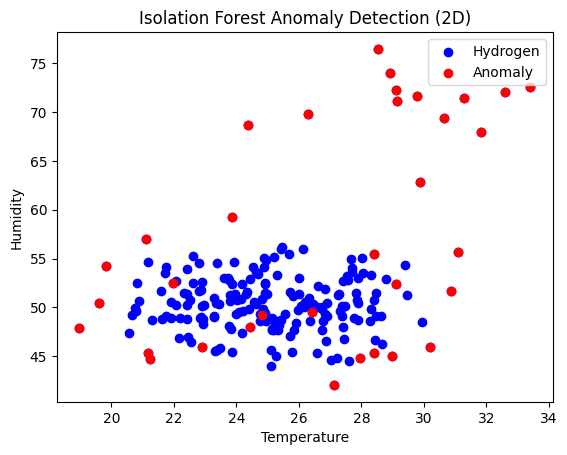

In [13]:
# Plot normal data points
plt.scatter(X_test['Temperature'], X_test['Humidity'], c='blue', label='Hydrogen')

# Plot anomalies detected by the model
anomalies = X_test[predictions == -1]  # Select data points predicted as anomalies
plt.scatter(anomalies['Temperature'], anomalies['Humidity'], c='red', label='Anomaly')

plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.title('Isolation Forest Anomaly Detection (2D)')
plt.legend()
plt.show()


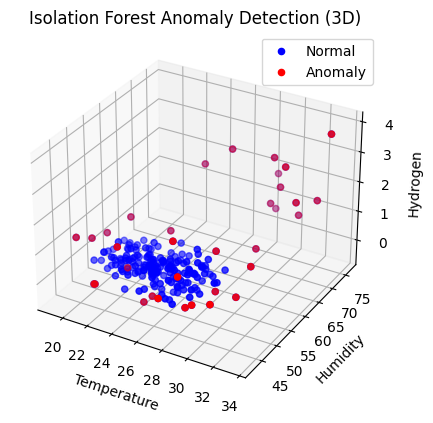

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot normal data points
ax.scatter(X_test['Temperature'], X_test['Humidity'], X_test['Hydrogen'], c='blue', label='Normal')

# Plot anomalies detected by the model
anomalies = X_test[predictions == -1]  # Select data points predicted as anomalies
ax.scatter(anomalies['Temperature'], anomalies['Humidity'], anomalies['Hydrogen'], c='red', label='Anomaly')

ax.set_xlabel('Temperature')
ax.set_ylabel('Humidity')
ax.set_zlabel('Hydrogen')
ax.set_title('Isolation Forest Anomaly Detection (3D)')
ax.legend()
plt.show()


In [15]:
from joblib import dump
# Dump the trained model to a file
dump(clf, 'anomaly-model2.joblib')


['anomaly-model2.joblib']

In [17]:
from joblib import load
# Load the trained model
loaded_model = load('anomaly-model2.joblib')


In [18]:
# Calculate anomaly scores for the original dataset
original_scores = loaded_model.decision_function(X_train)  # Assuming X_train is the training dataset


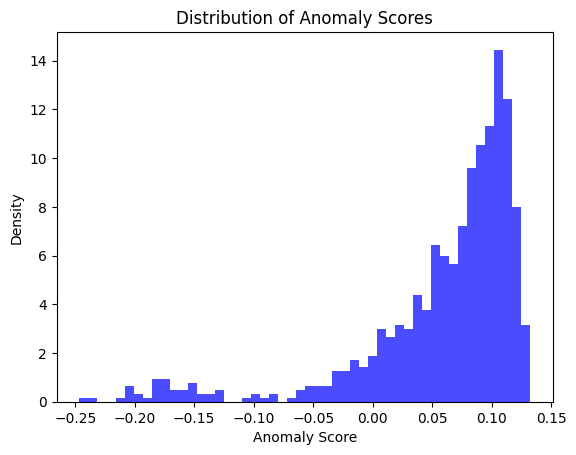

In [19]:
# Analyze the distribution of anomaly scores
plt.hist(original_scores, bins=50, density=True, alpha=0.7, color='blue')
plt.xlabel('Anomaly Score')
plt.ylabel('Density')
plt.title('Distribution of Anomaly Scores')
plt.show()


In [20]:
# Select threshold based on percentile of the score distribution
threshold_percentile = 95  # Example: 95th percentile
threshold = np.percentile(original_scores, threshold_percentile)

print(f"Selected threshold based on {threshold_percentile}th percentile: {threshold}")


Selected threshold based on 95th percentile: 0.12113207185050631


In [9]:
from joblib import load

# Load the trained model
loaded_model = load('anomaly-model2.joblib')

# Load the new dataset
new_data = pd.read_csv('test_dataset.csv')  # Replace 'new_dataset.csv' with the path to your new dataset file

# Assuming new_data has the same features as the original dataset used for training

# Make predictions on the new dataset
new_predictions = loaded_model.decision_function(new_data)

# Analyze anomaly scores
# You may need to adjust the threshold based on the distribution of anomaly scores from the original dataset
threshold = -0.121  # Example threshold
predicted_anomalies = new_data[new_predictions < threshold]

# Print the predicted anomalies
print("Predicted Anomalies:")
print(predicted_anomalies)

# Optionally, evaluate the model's performance using ground truth labels (if available)
# Compare the predicted anomalies with known anomalies to calculate precision, recall, etc.


Predicted Anomalies:
    Temperature   Humidity  Hydrogen
10    26.159604  67.693717  2.209608
11    31.310351  70.890746  1.386566
12    33.380363  70.037597  1.327232
13    28.823487  73.169757  1.646778
14    27.159000  64.512463  2.651618
15    29.816367  67.392031  3.775782
16    25.554424  69.072372  1.744412
17    32.198684  74.828243  2.274811
18    28.627017  69.634898  1.729653
19    30.894108  74.424366  1.971052
20    31.125205  71.238886  1.874978
21    28.023442  73.428850  1.772263
22    30.189953  66.611184  1.651077
